<a href="https://colab.research.google.com/github/alejanpublic/POO/blob/main/ejercicio_alumni_poo_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 01**
Una empresa se dedica al alquiler de DVD. Dicha empresa tiene un local de atención al público donde
están expuestas las carátulas de los DVD más demandados y las últimas novedades, aunque también
existen listados en papel de todos los títulos que se podrían alquilar. Cuando un cliente solicita en
alquiler un título, se comprueba si hay ejemplares disponibles y si el cliente no tiene problemas por
ejemplares no devueltos, se alquila el DVD quedando constancia de la fecha de alquiler y la fecha
máxima de entrega; de forma que cuando el cliente devuelva el ejemplar se podrá comprobar si se
le tiene que imponer una sanción. Cada cliente puede solicitar un listado de los DVD que ha alquilado
previamente.


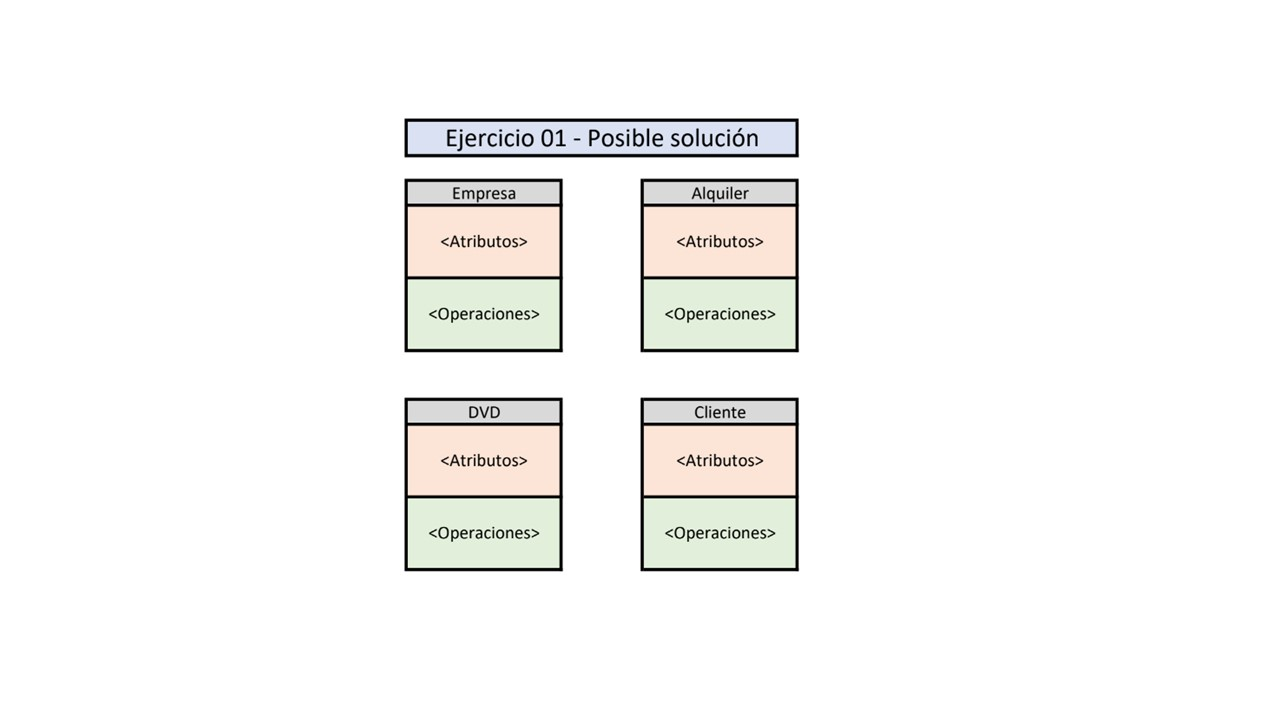

In [1]:

#  podemos crear un programa en Python que implemente este escenario
#  utilizando el paradigma orientado a objetos. Vamos a crear tres clases:
#  DVD, Cliente y EmpresaAlquilerDVD. Cada una de estas clases tendrá atributos y
#  métodos que representen las funcionalidades descritas en el ejercicio.


import datetime

class DVD:
    def __init__(self, titulo):
        self.titulo = titulo
        self.disponibles = 5  # Inicialmente hay 5 ejemplares disponibles
        self.alquilados = []

    def alquilar(self, cliente):
        if self.disponibles > 0 and not cliente.tiene_sanciones():
            self.disponibles -= 1
            fecha_alquiler = datetime.date.today()
            fecha_entrega = fecha_alquiler + datetime.timedelta(days=7)  # 7 días de plazo
            self.alquilados.append((cliente, fecha_alquiler, fecha_entrega))
            return True
        else:
            return False

    def devolver(self, cliente):
        for alquiler in self.alquilados:
            if alquiler[0] == cliente:
                self.alquilados.remove(alquiler)
                self.disponibles += 1
                return True
        return False

class Cliente:
    def __init__(self, nombre):
        self.nombre = nombre
        self.sancionado = False

    def tiene_sanciones(self):
        return self.sancionado

    def recibir_sancion(self):
        self.sancionado = True

    def levantar_sancion(self):
        self.sancionado = False

class EmpresaAlquilerDVD:
    def __init__(self):
        self.catalogo = []

    def agregar_dvd(self, dvd):
        self.catalogo.append(dvd)

    def buscar_dvd(self, titulo):
        for dvd in self.catalogo:
            if dvd.titulo == titulo:
                return dvd
        return None

    def listar_alquileres_cliente(self, cliente):
        alquileres = []
        for dvd in self.catalogo:
            for alquiler in dvd.alquilados:
                if alquiler[0] == cliente:
                    alquileres.append((dvd.titulo, alquiler[1], alquiler[2]))
        return alquileres

# Ahora, puedes crear instancias de las clases y utilizar los métodos para
# simular el alquiler de DVDs. Aquí hay un ejemplo de cómo hacerlo:

# Crear DVDs
dvd1 = DVD("Pelicula A")
dvd2 = DVD("Pelicula B")

# Agregar DVDs al catálogo de la empresa
empresa = EmpresaAlquilerDVD()
empresa.agregar_dvd(dvd1)
empresa.agregar_dvd(dvd2)

# Crear clientes
cliente1 = Cliente("Juan")
cliente2 = Cliente("Maria")

# Intentar alquilar DVDs
alquiler1 = dvd1.alquilar(cliente1)  # Juan alquila Pelicula A
alquiler2 = dvd2.alquilar(cliente2)  # Maria alquila Pelicula B

# Listar alquileres de un cliente
alquileres_juan = empresa.listar_alquileres_cliente(cliente1)
alquileres_maria = empresa.listar_alquileres_cliente(cliente2)

# Devolver DVDs
dvd1.devolver(cliente1)  # Juan devuelve Pelicula A
dvd2.devolver(cliente2)  # Maria devuelve Pelicula B


# Este es un ejemplo básico para demostrar cómo se pueden usar las clases y
# métodos para llevar a cabo las operaciones descritas en el ejercicio. Puedes
# expandir y mejorar el programa según tus necesidades específicas.







True

**Ejercicio 02**
Se tienen CLIENTES de los que se guarda un número de cliente, nombre, apellidos, lista de teléfonos,
fax y correo electrónico. Los clientes realizan PEDIDOS. (Un pedido no puede ser realizado por dos
clientes simultáneamente). Cada pedido tiene un número de pedido, una fecha asociada y una
persona de contacto. Cada pedido agrupa varias LÍNEAS DE DETALLE, cada una con una cantidad y
una referencia a un artículo. Los ARTÍCULOS tienen una descripción, una categoria y un modelo.
Varias líneas de detalle correspondientes a uno o varios pedidos (en su totalidad, ó en parte)
constituyen un REMITO. Los remitos contienen una fecha de entrega, una dirección de entrega y el
nombre y apellido del receptor. Uno ó varios remitos constituyen una FACTURA, la cual contiene un
número de factura, el monto, una fecha de cobro y una forma de pago.

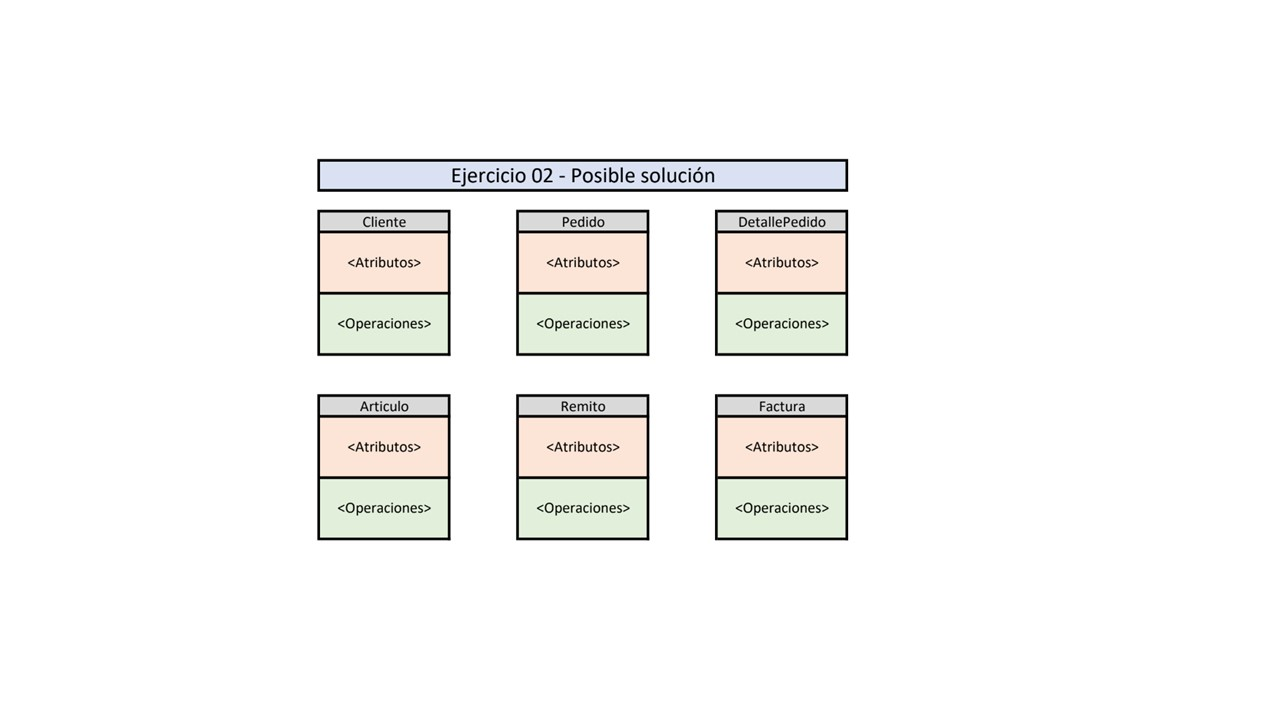

In [2]:
# Para abordar este ejercicio, vamos a crear las clases Cliente, Pedido,
# LineaDetalle, Articulo, Remito y Factura, cada una con sus atributos y
# métodos correspondientes. A continuación te proporciono una implementación
# en Python:


class Cliente:
    def __init__(self, num_cliente, nombre, apellidos, telefonos, fax, correo):
        self.num_cliente = num_cliente
        self.nombre = nombre
        self.apellidos = apellidos
        self.telefonos = telefonos
        self.fax = fax
        self.correo = correo
        self.pedido_actual = None

    def realizar_pedido(self, numero_pedido, fecha_pedido, persona_contacto):
        if not self.pedido_actual:
            self.pedido_actual = Pedido(numero_pedido, fecha_pedido, persona_contacto, self)
            return self.pedido_actual
        else:
            return None

    def agregar_telefono(self, telefono):
        self.telefonos.append(telefono)

class Pedido:
    def __init__(self, numero_pedido, fecha_pedido, persona_contacto, cliente):
        self.numero_pedido = numero_pedido
        self.fecha_pedido = fecha_pedido
        self.persona_contacto = persona_contacto
        self.cliente = cliente
        self.lineas_detalle = []

    def agregar_linea_detalle(self, cantidad, articulo):
        linea = LineaDetalle(cantidad, articulo)
        self.lineas_detalle.append(linea)

    def generar_remito(self, fecha_entrega, direccion_entrega, nombre_receptor):
        return Remito(self, fecha_entrega, direccion_entrega, nombre_receptor)

class LineaDetalle:
    def __init__(self, cantidad, articulo):
        self.cantidad = cantidad
        self.articulo = articulo

    def subtotal(self):
        return self.cantidad * self.articulo.precio

class Articulo:
    def __init__(self, descripcion, categoria, modelo, precio):
        self.descripcion = descripcion
        self.categoria = categoria
        self.modelo = modelo
        self.precio = precio

class Remito:
    def __init__(self, pedido, fecha_entrega, direccion_entrega, nombre_receptor):
        self.pedido = pedido
        self.fecha_entrega = fecha_entrega
        self.direccion_entrega = direccion_entrega
        self.nombre_receptor = nombre_receptor

    def total(self):
        return sum(linea.subtotal() for linea in self.pedido.lineas_detalle)

class Factura:
    def __init__(self, numero_factura, monto, fecha_cobro, forma_pago, remitos):
        self.numero_factura = numero_factura
        self.monto = monto
        self.fecha_cobro = fecha_cobro
        self.forma_pago = forma_pago
        self.remitos = remitos

    def total(self):
        return sum(remito.total() for remito in self.remitos)


# Con estas clases, puedes simular el proceso de clientes que realizan pedidos,
# generan remitos y luego se emiten facturas. Por ejemplo:


# Crear un cliente
cliente1 = Cliente("C001", "Juan", "Perez", ["555-1234"], "555-5678", "juan@example.com")

# Agregar teléfonos adicionales
cliente1.agregar_telefono("555-4321")

# Realizar un pedido
pedido1 = cliente1.realizar_pedido("P001", "2023-09-15", "Maria")

# Agregar líneas de detalle al pedido
articulo1 = Articulo("Articulo 1", "Electrónica", "Modelo A", 100)
articulo2 = Articulo("Articulo 2", "Ropa", "Modelo B", 50)
pedido1.agregar_linea_detalle(2, articulo1)
pedido1.agregar_linea_detalle(3, articulo2)

# Generar un remito
remito1 = pedido1.generar_remito("2023-09-20", "Calle 123", "Pedro")

# Crear una factura
factura1 = Factura("F001", remito1.total(), "2023-09-25", "Tarjeta", [remito1])

# Calcular el total de la factura
total_factura = factura1.total()

print(f"Total de la factura: {total_factura}")

# Esta implementación proporciona una estructura básica para manejar clientes,
# pedidos, líneas de detalle, artículos, remitos y facturas. Puedes expandir y
# adaptar estas clases según tus necesidades específicas.




Total de la factura: 350


**Ejercicio 03**
Un centro de instalaciones deportivas quiere hacer una aplicación de reservas. En el centro existen
instalaciones deportivas (piscinas, gimnasios, frontones, canchas, etc.). El centro en cuestión tiene
socios, de los cuales se almacenan su dirección, ciudad, provincia, teléfono, nombre y estado. Existen
una serie de artículos que se pueden alquilar junto con las reservas (pelotas, redes, raquetas, etc.).
Cada instalación es reservada por un socio en una fecha dada desde una hora de inicio hasta una
hora de fin siempre y cuando esté al día en sus cuotas. Cada reserva puede tener asociada uno o
varios artículos deportivos que se alquilan a parte. Por ejemplo si yo quiero hacer una reserva para
jugar a voleibol tengo que reservar una instalación cancha más un artículo red, más un artículo
pelota.

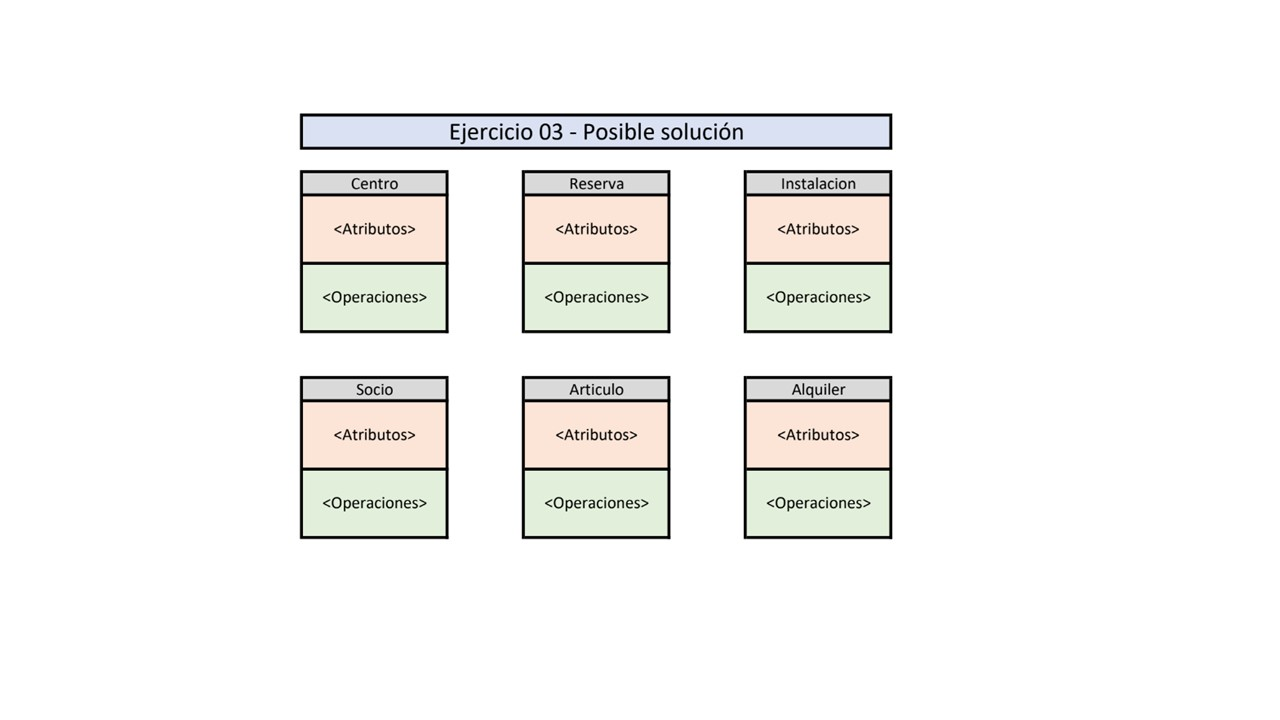

In [7]:

# Para abordar este ejercicio, vamos a crear las clases Socio, Instalacion,
# Reserva y Articulo, cada una con sus atributos y métodos correspondientes.
# A continuación, te proporciono una implementación en Python:

class Socio:
    def __init__(self, direccion, ciudad, provincia, telefono, nombre, estado):
        self.direccion = direccion
        self.ciudad = ciudad
        self.provincia = provincia
        self.telefono = telefono
        self.nombre = nombre
        self.estado = estado
        self.cuotas_al_dia = True

    def pagar_cuotas(self):
        self.cuotas_al_dia = True

class Instalacion:
    def __init__(self, nombre, tipo):
        self.nombre = nombre
        self.tipo = tipo
        self.reservas = []

    def hacer_reserva(self, socio, fecha, hora_inicio, hora_fin):
        if socio.cuotas_al_dia:
            reserva = Reserva(self, socio, fecha, hora_inicio, hora_fin)
            self.reservas.append(reserva)
            return reserva
        else:
            return None

class Reserva:
    def __init__(self, instalacion, socio, fecha, hora_inicio, hora_fin):
        self.instalacion = instalacion
        self.socio = socio
        self.fecha = fecha
        self.hora_inicio = hora_inicio
        self.hora_fin = hora_fin
        self.articulos = []

    def agregar_articulo(self, articulo):
        self.articulos.append(articulo)

class Articulo:
    def __init__(self, nombre):
        self.nombre = nombre
        self.alquilado = False

    def alquilar(self):
        self.alquilado = True

    def devolver(self):
        self.alquilado = False


# Con estas clases, puedes simular el proceso de reservas de instalaciones
# deportivas y alquiler de artículos. Por ejemplo:

# Crear socios
socio1 = Socio("Calle 123", "Ciudad A", "Provincia X", "555-1234", "Juan Perez", "Activo")
socio2 = Socio("Av. Principal", "Ciudad B", "Provincia Y", "555-5678", "Maria Lopez", "Activo")

# Pagar cuotas de socio 1
socio1.pagar_cuotas()

# Crear instalaciones
cancha_voleibol = Instalacion("Cancha de Voleibol", "Deportiva")
gimnasio = Instalacion("Gimnasio", "Deportiva")


# Hacer reservas
reserva1 = cancha_voleibol.hacer_reserva(socio1, "2023-09-15", "14:00", "16:00")
reserva2 = gimnasio.hacer_reserva(socio2, "2023-09-16", "10:00", "12:00")

# Crear artículos
pelota = Articulo("Pelota de Voleibol")
red = Articulo("Red de Voleibol")

# Agregar artículos a la reserva de voleibol
reserva1.agregar_articulo(pelota)
reserva1.agregar_articulo(red)

# Alquilar artículos
pelota.alquilar()
red.alquilar()

# Devolver artículos
pelota.devolver()
red.devolver()

# Esta implementación proporciona una estructura básica para manejar socios,
# instalaciones, reservas y artículos. Puedes expandir y adaptar estas clases
# según tus necesidades específicas. Si tienes más preguntas o necesitas
# más ayuda, no dudes en preguntar. Estoy aquí para ayudarte.
